In [1]:
import matplotlib.pyplot as plt
import pandas            as pd  
import numpy             as np

from sklearn.model_selection   import train_test_split
from sklearn.ensemble          import RandomForestClassifier
from sklearn.tree              import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.svm               import SVC
from sklearn.preprocessing     import LabelEncoder
from sklearn.metrics           import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from matplotlib.patches        import Patch
from matplotlib.colors         import rgb2hex
from seaborn                   import heatmap
from math                      import ceil
from IPython.display           import Image, display
from io                        import StringIO
from pydotplus                 import graph_from_dot_data
from warnings                  import filterwarnings

filterwarnings('ignore')

In [2]:
%%javascript
require(["notebook/js/outputarea"], function (oa) {oa.OutputArea.auto_scroll_threshold = -1;});

<IPython.core.display.Javascript object>

In [3]:
def plot_boundary(X, y, clf):
    # Create a mesh to plot in
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    grid = lambda max, min: np.arange(min, max, (max - min) / 80)
    xx, yy = np.meshgrid(grid(x_max, x_min), grid(y_max, y_min))

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.inferno, alpha=0.8) 

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.prism, alpha=0.8)
    
    plt.xlabel(list(X.head(0))[0])
    plt.ylabel(list(X.head(0))[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Creating a legend
    labels = []
    for element in y:
        if element not in labels:
            labels.append(element)
    labels = tuple(le.inverse_transform(labels))
    colors = list(map(lambda x: rgb2hex(x[:3]), plt.cm.get_cmap('inferno', len(labels)).colors))
    handles = tuple(Patch(color=colors[i], label=labels[i]) for i in range(len(labels)))
    plt.legend(handles=handles, fancybox=True, shadow=True, loc='best', bbox_to_anchor=(0.1, 1.0, 1.2, 0.0))
    
    if counter == 0:
        ticks = -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0
        plt.yticks(ticks, ['' if tick not in (0.0, 1.0, 2.0) else encoders[0].inverse_transform([int(tick)])[0] 
                             for tick in ticks])
    plt.show()

def plot_conf_matrix(conf_matrix):
    plt.figure(figsize=(5, 5))
    heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')    
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.xticks(tuple(map(lambda x: x + 0.5, range(len(set(dataset[3]))))), tuple(set(dataset[3])))
    plt.yticks(tuple(map(lambda x: x + 0.5, range(len(set(dataset[3]))))), list(set(dataset[3]))[::-1])
    plt.show()

def plot_decision_tree(clf, feature_names, class_names):
    dot_data = StringIO()  
    export_graphviz(clf,
        feature_names = feature_names,
        class_names   = class_names,
        max_depth     = 2 + 1 * (counter != 1),
        out_file      = dot_data, 
        impurity      = False,
        rounded       = True,
        filled        = True)
    display(Image(graph_from_dot_data(dot_data.getvalue()).create_png()))

Accuracy of the Random Forest Classifier on car dataset is 97.69%
Accuracy of the Decision Tree Classifier on car dataset is 98.61%
Accuracy of the Decision Tree Classifier trained on the distilled
car dataset and tested on the original dataset is 98.61%

Visualization of the Decision Tree trained on the distilled dataset


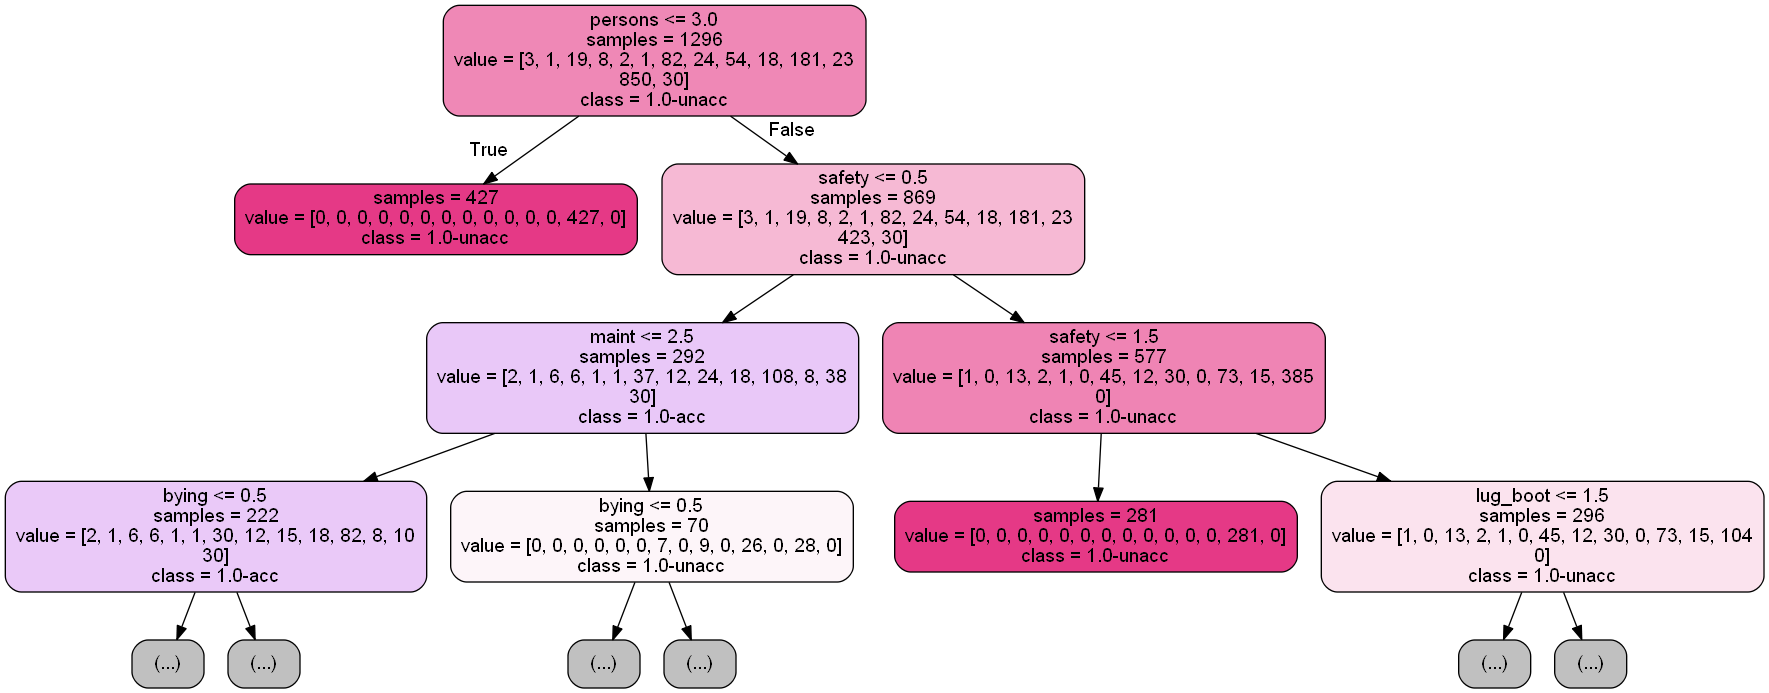


Visualization of the decision boundaries of the Decision
Tree Classifier trained on the distilled car dataset


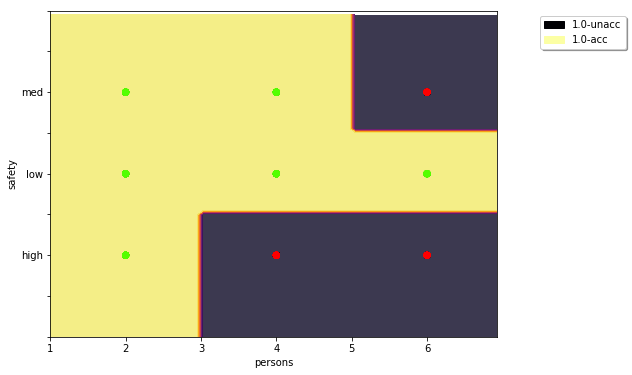

Accuracy of the Random Forest Classifier on bank dataset is 89.12%
Accuracy of the Decision Tree Classifier on bank dataset is 85.94%
Accuracy of the Decision Tree Classifier trained on the distilled
bank dataset and tested on the original dataset is 85.59%

Visualization of the Decision Tree trained on the distilled dataset


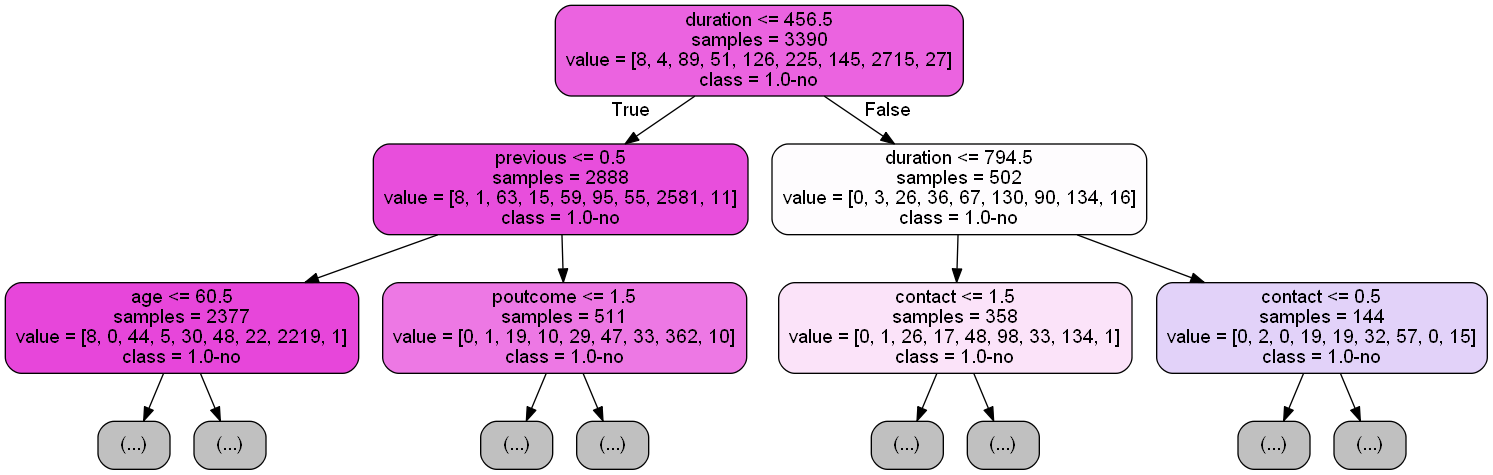


Visualization of the decision boundaries of the Decision
Tree Classifier trained on the distilled bank dataset


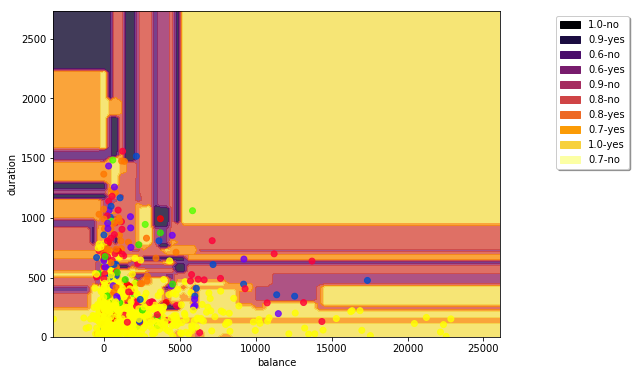

Accuracy of the Random Forest Classifier on iris dataset is 92.11%
Accuracy of the Decision Tree Classifier on iris dataset is 94.74%
Accuracy of the Decision Tree Classifier trained on the distilled
iris dataset and tested on the original dataset is 94.74%

Visualization of the Decision Tree trained on the distilled dataset


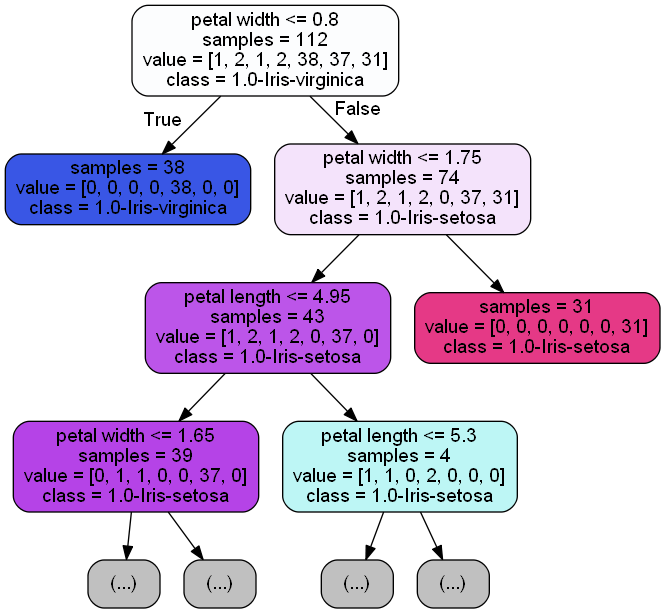


Visualization of the decision boundaries of the Decision
Tree Classifier trained on the distilled iris dataset


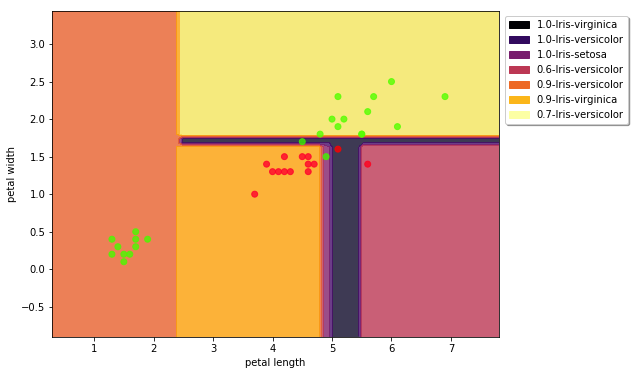



Other state-of-the-art methods on the selected datasets (KNC and SVC)


---------------- Car dataset ----------------

~~~~~~~~~~~~ Classification report ~~~~~~~~~~

              precision    recall  f1-score   support

       vgood       0.83      0.85      0.84        99
         acc       0.57      0.29      0.38        14
       unacc       0.95      0.99      0.97       304
        good       1.00      0.60      0.75        15

   micro avg       0.92      0.92      0.92       432
   macro avg       0.84      0.68      0.74       432
weighted avg       0.91      0.92      0.91       432

~~~~~~~~~~~~ Confusion matrix ~~~~~~~~~~~~~~~



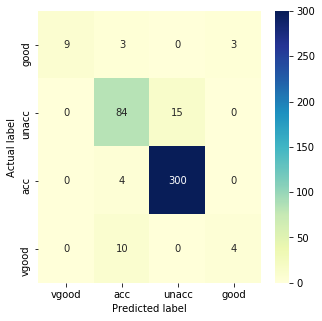

Accuracy of the KNeighborsClassifier on this dataset is 91.9%


~~~~~~~~~~~~ Classification report ~~~~~~~~~~

              precision    recall  f1-score   support

       vgood       0.77      0.48      0.60        99
         acc       0.00      0.00      0.00        14
       unacc       0.83      1.00      0.91       304
        good       1.00      0.47      0.64        15

   micro avg       0.83      0.83      0.83       432
   macro avg       0.65      0.49      0.54       432
weighted avg       0.80      0.83      0.80       432

~~~~~~~~~~~~ Confusion matrix ~~~~~~~~~~~~~~~



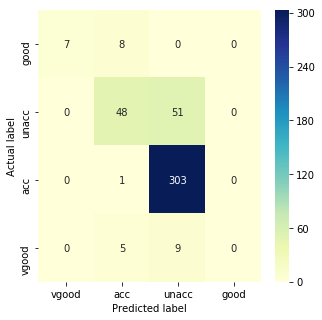

Accuracy of the SVC on this dataset is 82.87%


---------------- Bank dataset ----------------

~~~~~~~~~~~~ Classification report ~~~~~~~~~~

              precision    recall  f1-score   support

         yes       0.90      0.96      0.93      1005
          no       0.38      0.18      0.25       126

   micro avg       0.88      0.88      0.88      1131
   macro avg       0.64      0.57      0.59      1131
weighted avg       0.85      0.88      0.86      1131

~~~~~~~~~~~~ Confusion matrix ~~~~~~~~~~~~~~~



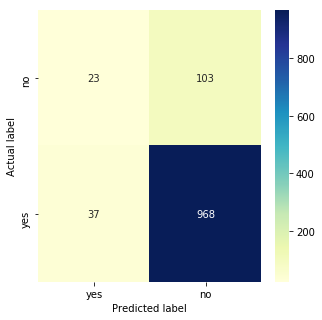

Accuracy of the KNeighborsClassifier on this dataset is 87.62%


~~~~~~~~~~~~ Classification report ~~~~~~~~~~

              precision    recall  f1-score   support

         yes       0.89      1.00      0.94      1005
          no       0.00      0.00      0.00       126

   micro avg       0.89      0.89      0.89      1131
   macro avg       0.44      0.50      0.47      1131
weighted avg       0.79      0.89      0.84      1131

~~~~~~~~~~~~ Confusion matrix ~~~~~~~~~~~~~~~



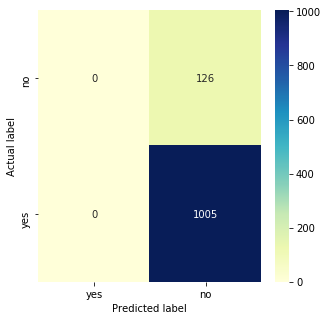

Accuracy of the SVC on this dataset is 88.86%


---------------- Iris dataset ----------------

~~~~~~~~~~~~ Classification report ~~~~~~~~~~

                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00        12
    Iris-setosa       1.00      0.82      0.90        11
Iris-versicolor       0.88      1.00      0.94        15

      micro avg       0.95      0.95      0.95        38
      macro avg       0.96      0.94      0.95        38
   weighted avg       0.95      0.95      0.95        38

~~~~~~~~~~~~ Confusion matrix ~~~~~~~~~~~~~~~



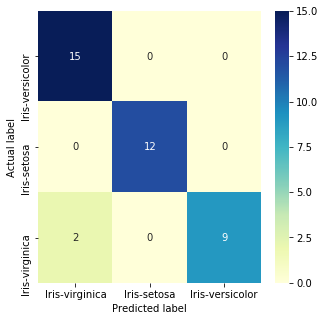

Accuracy of the KNeighborsClassifier on this dataset is 94.74%


~~~~~~~~~~~~ Classification report ~~~~~~~~~~

                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00        12
    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.94      1.00      0.97        15

      micro avg       0.97      0.97      0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

~~~~~~~~~~~~ Confusion matrix ~~~~~~~~~~~~~~~



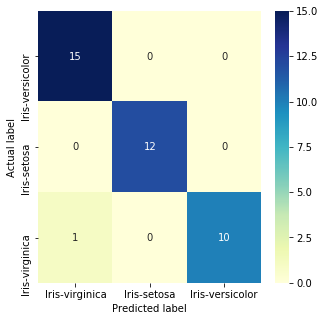

Accuracy of the SVC on this dataset is 97.37%




In [4]:
datasets = [ # List of all datasets
    pd.read_csv('car.csv', names=("bying", "maint", "doors", "persons", "lug_boot", "safety", "acceptability")), 
    pd.read_csv('bank.csv', sep=';'), 
    pd.read_csv('iris.csv', names=("sepal length", "sepal width", "petal length", "petal width", "class"))]

datasets[0]['persons'] = datasets[0]['persons'].replace('more', 6).astype('int64')

encoders = [] # List of usefull encoders
for j, dataset in enumerate(datasets):
    length = len(dataset.columns)
    for i in range(length):
        if pd.api.types.is_string_dtype(dataset.iloc[:, i]):
            le = LabelEncoder()
            dataset.iloc[:, i] = le.fit_transform(dataset.iloc[:, i])
            if i == length - 1 or dataset.columns[i] == 'safety':
                encoders.append(le)
           
data = ( # Collection of x and y for each dataset
    [datasets[0].iloc[:, :-1], datasets[0].iloc[:, -1]],
    [datasets[1].iloc[:, :-1], datasets[1].iloc[:, -1]],
    [datasets[2].iloc[:, :-1], datasets[2].iloc[:, -1]])

# Split each dataset into train and test datasets
datasets[0] = list(train_test_split(*data[0]))
datasets[1] = list(train_test_split(*data[1]))
datasets[2] = list(train_test_split(*data[2]))

tips = 'car', 'bank', 'iris'
for counter, dataset in enumerate(datasets):
    rfclassifier = RandomForestClassifier(n_estimators=100)
    rfclassifier.fit(dataset[0], dataset[2])
    print(f"Accuracy of the Random Forest Classifier on {tips[counter]} dataset is " +\
          f"{round(accuracy_score(dataset[3], rfclassifier.predict(dataset[1])) * 100, 2)}%")
    
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(dataset[0], dataset[2])
    print(f"Accuracy of the Decision Tree Classifier on {tips[counter]} dataset is " +\
          f"{round(accuracy_score(dataset[3], classifier.predict(dataset[1])) * 100, 2)}%")
    
    new_y = []
    predictions = rfclassifier.predict(dataset[0])
    probabilities = rfclassifier.predict_proba(dataset[0])
    for count in range(len(dataset[0])):
        bin = probabilities[count][predictions[count]]
        if bin != 1.0:
            if bin == 0.1 * int(10 * bin):
                bin += 0.1
            bin = round(0.1 * ceil(10 * bin), 1)
        new_y.append(f"{bin}-{encoders[counter + 1].inverse_transform([predictions[count]])[0]}")
    class_names = new_y.copy()
    le = LabelEncoder()
    new_y = le.fit_transform(new_y)
    
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(dataset[0], new_y)
    predictions = list(map(lambda x: x[1 + x.index('-'):], le.inverse_transform(classifier.predict(dataset[1]))))
    print('Accuracy of the Decision Tree Classifier ' +\
          f"trained on the distilled\n{tips[counter]} dataset and tested on the original dataset is " +\
          f"{round(accuracy_score(dataset[3], encoders[counter + 1].transform(predictions)) * 100, 2)}%")
    
    print('\nVisualization of the Decision Tree trained on the distilled dataset')
    plot_decision_tree(classifier, dataset[0].columns, class_names)

    selector = RFE(classifier, 2)
    selector.fit(data[counter][0], data[counter][1])
    filter = lambda x: x[[x.columns[i] for i in range(len(x.columns)) if selector.support_[i]]]
    
    x_train, x_test = train_test_split(data[counter][0])
    predictions = rfclassifier.predict(x_train)
    probabilities = rfclassifier.predict_proba(x_train)
    x_train = filter(x_train)
    x_test = filter(x_test)
    new_y = []
    for count in range(len(x_train)):
        bin = probabilities[count][predictions[count]]
        if bin != 1.0:
            if bin == 0.1 * int(10 * bin):
                bin += 0.1
            bin = round(0.1 * ceil(10 * bin), 1)
        new_y.append(f"{bin}-{encoders[counter + 1].inverse_transform([predictions[count]])[0]}")
    le = LabelEncoder()
    new_y = le.fit_transform(new_y)
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(x_train, new_y)
    
    print('\nVisualization of the decision boundaries of the Decision\nTree Classifier ' +\
          f"trained on the distilled {tips[counter]} dataset")
    plot_boundary(x_test, classifier.predict(x_test), classifier)

print('\n\nOther state-of-the-art methods on the selected datasets (KNC and SVC)\n\n')
for counter, dataset in enumerate(datasets):
    print(f"---------------- {tips[counter].capitalize()} dataset ----------------", end='\n\n')
    for i in range(2):
        if not i:
            classifier = KNeighborsClassifier()
            dataset[3] = encoders[counter + 1].inverse_transform(dataset[3])
        else:
            classifier = SVC(gamma='scale')

        classifier.fit(dataset[0], dataset[2]) 
        predictions = encoders[counter + 1].inverse_transform(classifier.predict(dataset[1]))

        print('~' * 12 + ' Classification report ' + '~' * 10, end='\n\n')
        print(classification_report(dataset[3], predictions, target_names=set(dataset[3])))
        print('~' * 12 + ' Confusion matrix ' + '~' * 15, end='\n\n')
        plot_conf_matrix(confusion_matrix(dataset[3], predictions, labels=list(set(dataset[3]))))
        print(f"Accuracy of the {('KNeighborsClassifier', 'SVC')[i]} on this dataset is " +\
        f"{round(accuracy_score(dataset[3], predictions) * 100, 2)}%", end='\n' * 3)